## I - Load Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)

In [2]:
# Define constants
NUMBER_OF_CLASSES = 10
EPOCHS = 50
BATCH_SIZE = 2**4
VALIDATION_SPLIT = .2

## II - Load Dataset and Process

### 1. Load data

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

In [4]:
# Check dims
print("X_train shape: %s" % str(X_train.shape))
print("X_test shape: %s" % str(X_test.shape))
print("Y_train shape: %s" % str(Y_train.shape))
print("Y_test shape: %s" % str(Y_test.shape))
print("Y_train classes: %s" % np.unique(Y_train))
print("Y_test classes: %s" % np.unique(Y_test))

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
Y_train shape: (50000, 1)
Y_test shape: (10000, 1)
Y_train classes: [0 1 2 3 4 5 6 7 8 9]
Y_test classes: [0 1 2 3 4 5 6 7 8 9]


As we can see, [the CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset totally consists of 60,000 RGB images of size 32x32 in 10 classes where each class have 6,000 images. Our training dataset has 50,000 examples while our test dataset has 10,000 examples. The shape `(50000, 32, 32, 3)` of `X_train`, for example, represents that the training set has 50,000 examples, each image has the size of 32x32 with three (RGB) channels.

### 2. Observe some data examples

/home/sshuser/.local/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


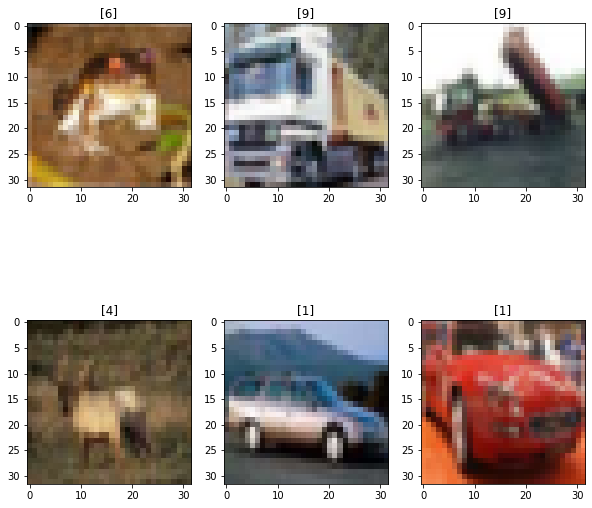

In [5]:
# Observe some training examples
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(Y_train[i])

### 3. Convert to float32

In [6]:
# Check datatype
print("X_train data type: %s" % X_train.dtype)
print("X_test data type: %s" % X_test.dtype)
print("Y_train data type: %s" % Y_train.dtype)
print("Y_test data type: %s" % Y_test.dtype)

X_train data type: uint8
X_test data type: uint8
Y_train data type: uint8
Y_test data type: uint8


Usually, datasets loaded from `keras` have `int8` or `int16` datatype. Although `keras` may implicitly convert it to `float32` to increase floating point precision, it is a good practice to explicitly convert it in the preprocessing step.

In [7]:
# Convert to float32 for X_train and X_test
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [8]:
# Confirm if their new data types
print("X_train data type: %s" % X_train.dtype)
print("X_test data type: %s" % X_test.dtype)

X_train data type: float32
X_test data type: float32


### 4. Normalize data

In [9]:
# Check data range of X_train and X_test
print("X_train value range: %.1f" % np.ptp(X_train))
print("X_test value range: %.1f" % np.ptp(X_test))

X_train value range: 255.0
X_test value range: 255.0


In [10]:
# Normalize X_train and X_test to 0-1 range
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

In [11]:
# Confirm normalization
print("X_train new value range: %.1f" % np.ptp(X_train))
print("X_test new value range: %.1f" % np.ptp(X_test))

X_train new value range: 1.0
X_test new value range: 1.0


### 5. One-hot encode

In [12]:
# One hot encoding Y_train and Y_test
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [13]:
# Confirm one-hot encoding works
print("Y_train shape: %s" % str(Y_train.shape))
print("Y_test shape: %s" % str(Y_test.shape))

Y_train shape: (50000, 10)
Y_test shape: (10000, 10)


## III - Build a Baseline Model

In this section, we will build a baseline CNN model using LeNet-5 architecture. As described in several previous posts, the LeNet-5 consists of seven layers:

1. `Conv2D`: 6 filters 5x5, stride=1, padding="valid".
2. `MaxPooling2D`: 2x2, stride=2, padding="valid".
3. `Conv2D`: 16 filters 5x5, stride=1, padding="valid".
4. `MaxPooling2D`: 2x2, stride=2, padding="valid".
5. `Dense`: 120 units, activation="relu".
6. `Dense`: 84 units, activation="relu".
7. `Dense`: 10 units, activation="softmax".

In [14]:
def create_model():
    model = keras.models.Sequential()
    
    model.add(keras.layers.Input(shape=(32, 32, 3)))
    
    model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=1, padding="valid"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
    
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=1, padding="valid"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("relu"))
    
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(units=120, activation="relu"))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Dense(units=84, activation="relu"))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Dense(units=10, activation="softmax"))
    
    model.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
    
    return model

In [15]:
# Summary the model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 6)         24        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 16)        6

In [16]:
# Fit the model
history = model.fit(X_train, Y_train,
         verbose=1,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         validation_split=VALIDATION_SPLIT)

Epoch 1/50
2500/2500 [==============================] - 19s 7ms/step - loss: 1.6163 - accuracy: 0.4216 - val_loss: 1.6723 - val_accuracy: 0.4258

In [17]:
# Evaluate on the test data
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1932 - accuracy: 0.6467

[1.1932439804077148, 0.6467000246047974]

## IV - Model History

In [18]:
df_loss_acc = pd.DataFrame(history.history)
df_loss_acc.describe()

,loss,accuracy,val_loss,val_accuracy
count,50.000000,50.000000,50.000000,50.000000
mean,0.746095,0.736583,1.129891,0.633708
std,0.223635,0.079091,0.105541,0.039559
min,0.530693,0.421550,0.989485,0.425800
25%,0.586521,0.709562,1.070736,0.629850
50%,0.673647,0.762087,1.104811,0.646950
75%,0.828415,0.790306,1.165410,0.654100
max,1.616260,0.813100,1.672291,0.668700


<AxesSubplot:title={'center':'Training vs Dev Accuracy'}>

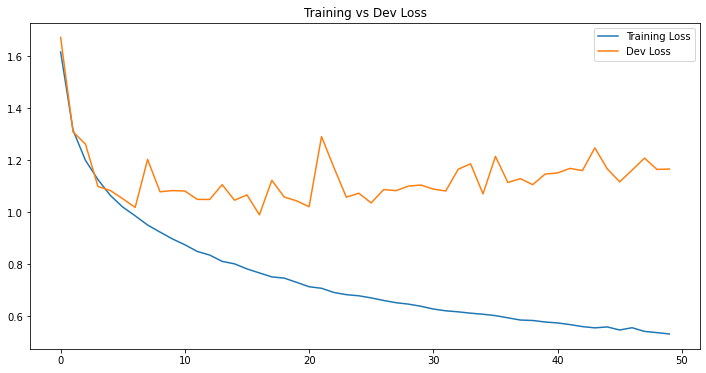

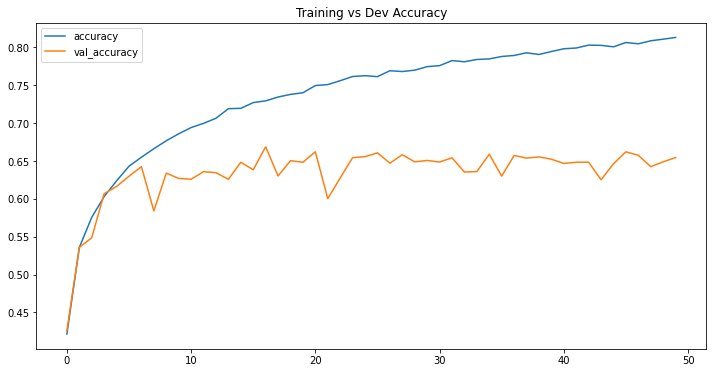

In [19]:
# Plot history
df_loss = df_loss_acc[['loss', 'val_loss']]
df_loss = df_loss.rename(columns={'loss': 'Training Loss', 'val_loss': 'Dev Loss'})
df_acc = df_loss_acc[['accuracy', 'val_accuracy']]
df_acc = df_acc.rename(columns={'acc': 'Training Accuracy', 'val_acc': 'Dev Accuracy'})

df_loss.plot(title="Training vs Dev Loss", figsize=(12, 6))
df_acc.plot(title="Training vs Dev Accuracy", figsize=(12, 6))

Without using any particular technique, we can clearly see that this baseline model is terribly overfitted when both training loss and accuracy steadily decreased but validation loss and accuracy upshot just after epochs. We will leave it as is and see if we can improve our model in later posts.